# 数据绘图要点11-雷达图的注意事项

准确通过雷达图表现数据有许多值得需要思考的地方，本文主要介绍雷达图的一些注意事项。

## 雷达图绘制
### 基础雷达图
雷达图又称蜘蛛图或网络图，是一种二维图表类型，设计用于绘制多个定量变量的一个或多个数值系列。每个变量都有自己的轴，所有轴都连接在图形的中心。让我们考虑一个学生的考试成绩。他在数学、体育、统计学等十个主题上的得分范围为 0 到 20。雷达图为每个主题提供一个轴。通过该形状，您可以查看学生在哪些主题上表现出色或表现不佳。

In [99]:
# 加载库
library(tidyverse)
library(viridis)
library(patchwork)
library(hrbrthemes)
library(fmsb)
library(colormap)


# 创建数据
#设计随机种子
set.seed(42) 
# 设计数据
data <- as.data.frame(matrix( sample( 2:20 , 10 , replace=T) , ncol=10)) 
# 添加列名
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )
# 在数据中添加每一列的最大范围和最小范围
data <- rbind(rep(20,10) , rep(0,10) , data)
data

math,english,biology,music,R-coding,data-viz,french,physic,statistic,sport
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
18,6,2,11,5,19,18,16,8,5


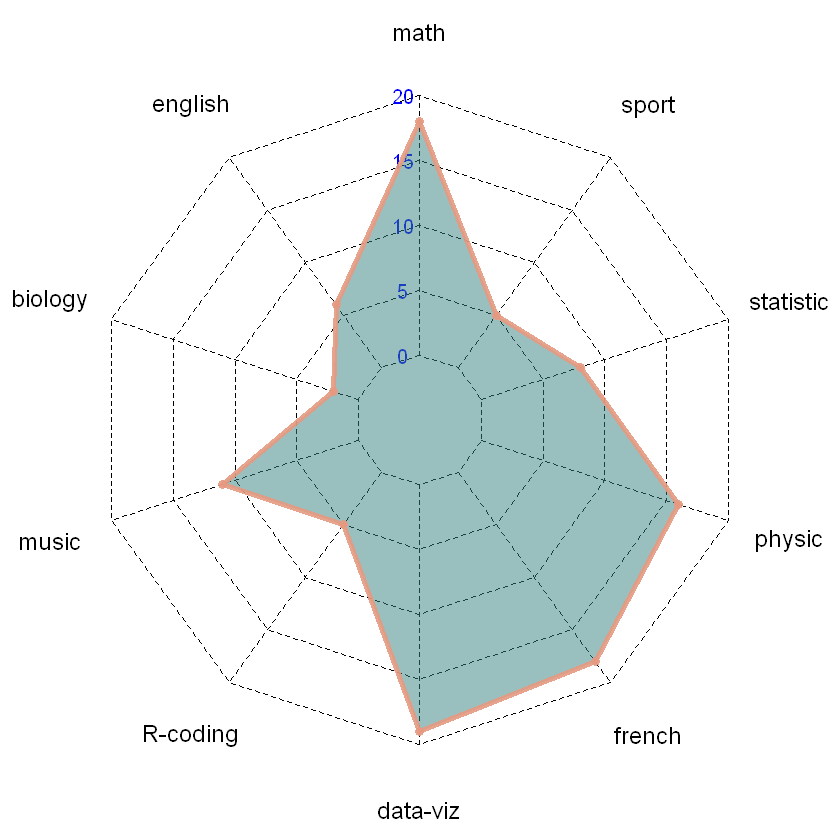

In [100]:

# 创建雷达图
par(mar=c(0,0,0,0))
radarchart( data, axistype=1, 
           # 自定义雷达图四边形
           # pcol设置四边形边框颜色，pfcol设置四边形填充颜色，plwd设置边框粗细
           pcol=rgb(0.9,0.6,0.5,0.9) , pfcol=rgb(0.2,0.5,0.5,0.5) , plwd=4, 
           # 自定义网格
           # cglcol设置网格线条颜色，cglty设置网格线条类型，axislabcol设置轴标签字体颜色
           # caxislabels设置轴的范围，cglwd设置网格线条粗细
           cglcol="black", cglty=2, axislabcol="blue", caxislabels=seq(0,20,5), cglwd=0.8,
           # vlcex设置类别标签位置大小
           vlcex=1.2 
)

### 多类别雷达图

在上一个图表中，只绘制了一个系列，显示了一名学生的表现。一个常见的任务是比较几个人。只需几个系列，就可以在同一图表上显示每个组。如下图所示，很明显，Shirley综合表现优于Sonia，除了在运动、英语和 R 编码方面。

In [101]:
# 创建数据
set.seed(1)
data <-as.data.frame(matrix( c( sample( 2:20 , 10 , replace=T), sample( 2:9 , 10 , replace=T)) , ncol=10, byrow=TRUE))
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )
# 设置第二行第二列数据为19
data[2,2]=19
# 在数据中添加每一列的最大范围和最小范围
data <- rbind(rep(20,10) , rep(0,10) , data)
data

math,english,biology,music,R-coding,data-viz,french,physic,statistic,sport
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
5,8,2,3,12,15,19,20,2,11
7,19,3,8,2,8,6,6,2,2


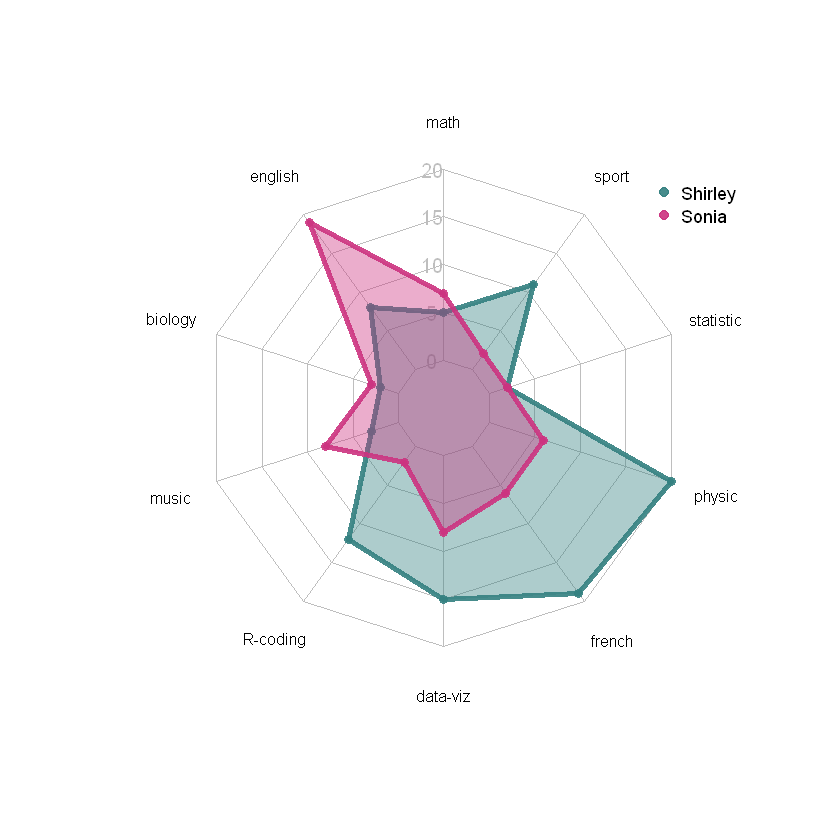

In [102]:
# 设置颜色
colors_border=c( rgb(0.2,0.5,0.5,0.9), rgb(0.8,0.2,0.5,0.9)  )
colors_in=c( rgb(0.2,0.5,0.5,0.4), rgb(0.8,0.2,0.5,0.4)  )

# 创建雷达图
radarchart( data, axistype=1, 
           # 自定义四边形
           pcol=colors_border , pfcol=colors_in , plwd=4, plty=1 , 
           # 自定义网格
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,20,5), cglwd=1.1,
           # 自定义标签
           vlcex=0.8 )

# 设置图例
# bty设置图例文字外边框样式，pch设置图例图标样式，col设置图例图标颜色
# text.col设置图例文字颜色，cex设置图例文字大小，pt.cex设置图例图标大小
legend(x=0.85, y=1, legend = c("Shirley", "Sonia"), bty = "n", pch=20 , col=colors_border , text.col = "black", cex=0.9, pt.cex=1.6)

对于两个或三个以上的系列，使用多子图是一个很好的做法，以避免出现杂乱的数字。每个学生都有自己的雷达图。很容易理解特定个体的特征，寻找形状的相似性可以让您找到具有相似特征的学生。



In [103]:
# 创建数据
set.seed(1)
data <-as.data.frame(matrix( sample( 2:20 , 60 , replace=T) , ncol=10, byrow=TRUE))
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )
# 在数据中添加每一列的最大范围和最小范围
data <- rbind(rep(20,10) , rep(0,10) , data)
data

math,english,biology,music,R-coding,data-viz,french,physic,statistic,sport
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
5,8,2,3,12,15,19,20,2,11
15,11,8,10,16,6,10,15,6,6
3,11,13,16,2,4,7,11,11,7
16,13,7,9,13,7,8,20,11,7
15,3,14,19,15,7,2,20,20,9
7,13,7,9,8,12,18,5,14,9


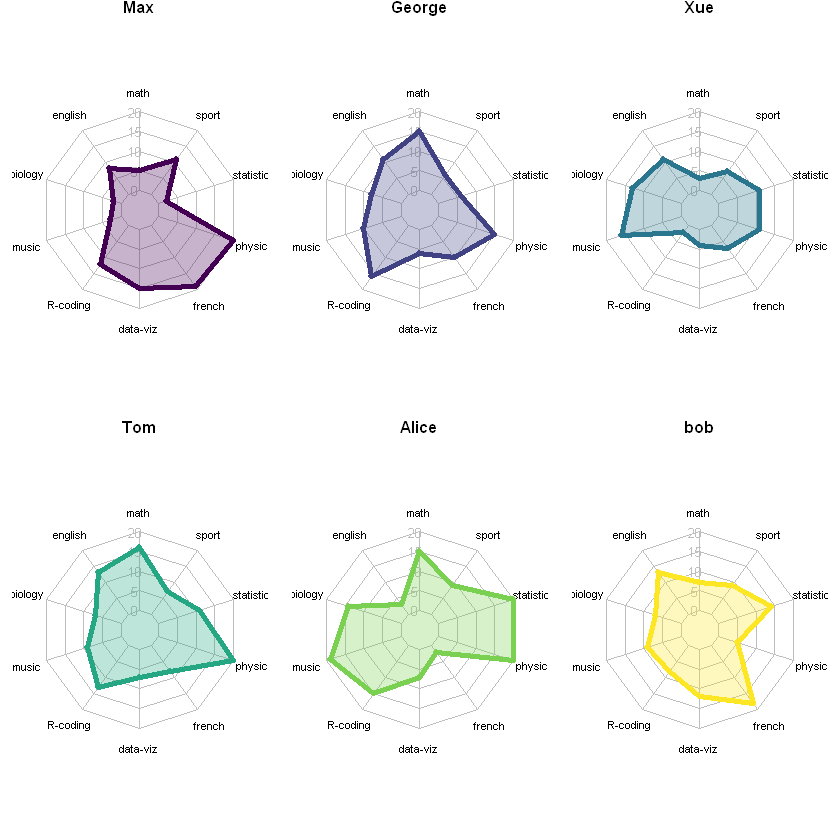

In [104]:
# 设置颜色
colors_border=colormap(colormap=colormaps$viridis, nshades=6, alpha=1)
colors_in=colormap(colormap=colormaps$viridis, nshades=6, alpha=0.3)

# 设置标题
mytitle <- c("Max", "George", "Xue", "Tom", "Alice", "bob")

# 设置子图
par(mar=rep(0.8,4))
par(mfrow=c(2,3))

# 依次绘图
for(i in 1:6){
    radarchart( data[c(1,2,i+2),], axistype=1, 
    pcol=colors_border[i] , pfcol=colors_in[i] , plwd=4, plty=1 , 
    cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,20,5), cglwd=0.8,
    vlcex=0.8,
    title=mytitle[i]
    )
}

## 雷达图存在的问题与解决方案
### 雷达图存在的问题

**1 圆形布局表示更难阅读**

沿着单个垂直或水平轴布局时，定量值更容易比较。这是对圆形布局的普遍指责。下图仅考虑一名学生的数据。比较条形图中的值更容易，也更准确。

In [105]:
# 创建数据
set.seed(1)
data <-as.data.frame(matrix( sample( 2:20 , 10 , replace=T) , ncol=10))
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )

# 在数据中添加每一列的最大范围和最小范围
data <-rbind(rep(20,10) , rep(0,10) , data)
data

math,english,biology,music,R-coding,data-viz,french,physic,statistic,sport
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
5,8,2,3,12,15,19,20,2,11


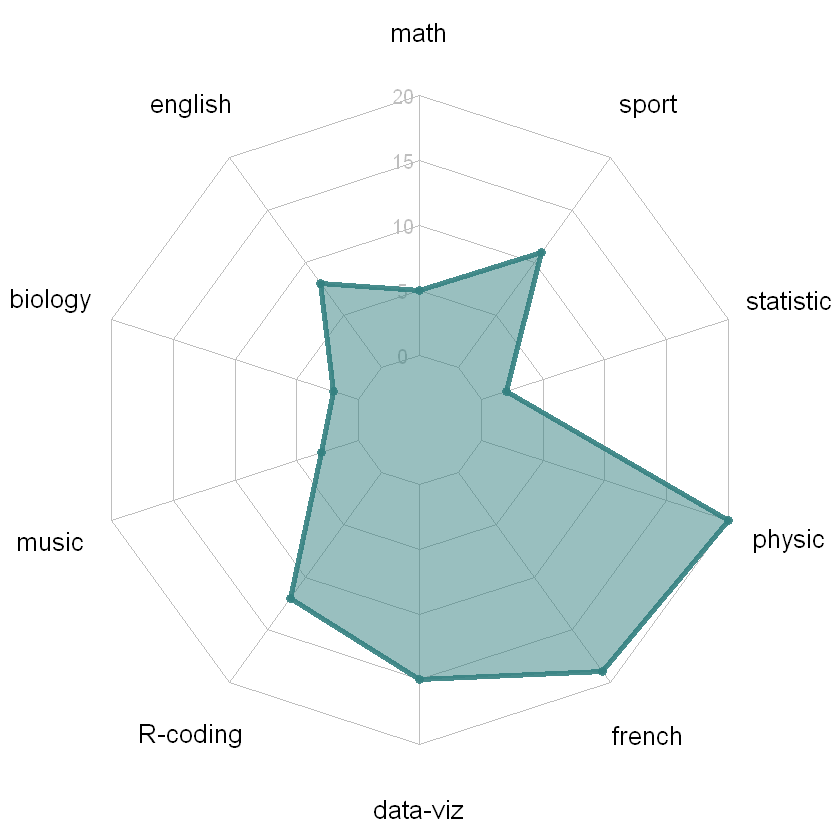

In [106]:
# 创建雷达图
par(mar=c(0,0,0,0))
p1 <- radarchart( data, axistype=1, 
                 pcol=rgb(0.2,0.5,0.5,0.9) , pfcol=rgb(0.2,0.5,0.5,0.5) , plwd=4 , 
                 cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,20,5), cglwd=0.8,vlcex=1.3 )

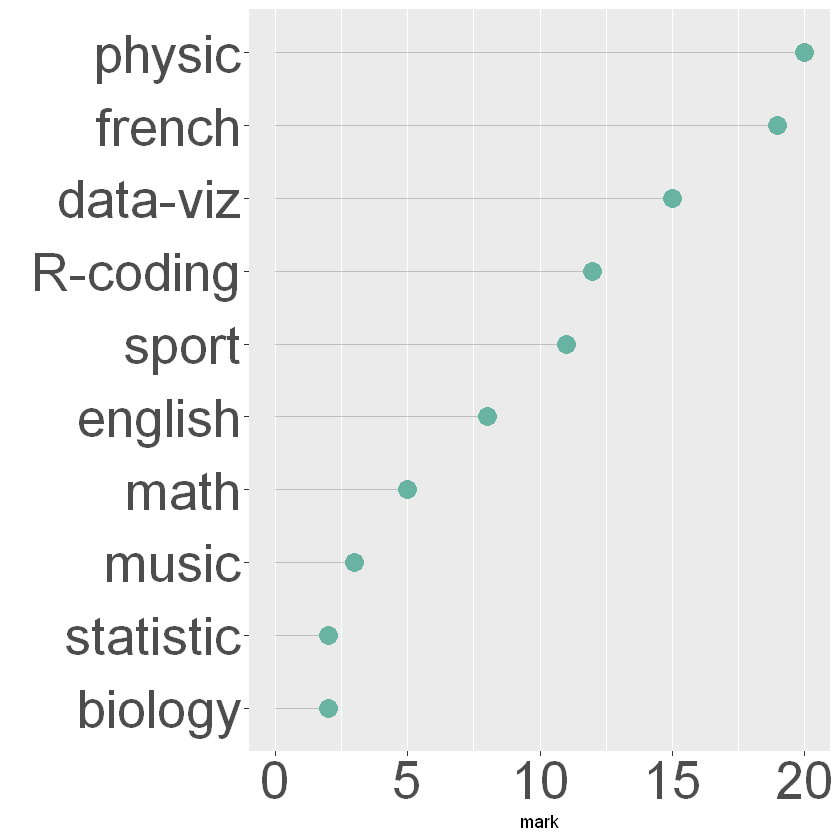

In [107]:

# 创建条形图
data %>% slice(3) %>% t() %>% as.data.frame() %>% add_rownames() %>% arrange(V1) %>% mutate(rowname=factor(rowname, rowname)) %>%
  ggplot( aes(x=rowname, y=V1)) +
    geom_segment( aes(x=rowname ,xend=rowname, y=0, yend=V1), color="grey") +
    geom_point(size=5, color="#69b3a2") +
    coord_flip() +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      axis.text = element_text( size=32),
      legend.position="none"
    ) +
    ylim(0,20) +
    ylab("mark") +
    xlab("")

**2 不支持排名**

在上面的例子中，棒棒糖图是有序的。它使您可以立即查看哪个主题的得分最高以及每个主题的排名。对于没有起点和终点的雷达图，这更加困难。

**3 类别排序有巨大的影响** 

雷达图的读者可能会关注观察到的形状。这可能会产生误导，因为这种形状高度依赖于周围类别的顺序。查看使用相同数据制作的这些图表，以下三张图数据一样，但更改了类别排序。


In [108]:
# 创建数据
set.seed(7)
data <- as.data.frame(matrix( sample( 2:20 , 10 , replace=T) , ncol=10))
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )
data[1,1:3]=rep(19,3)
data[1,6:8]=rep(4,3)
data <- rbind(rep(20,10) , rep(0,10) , data)
data

math,english,biology,music,R-coding,data-viz,french,physic,statistic,sport
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
19,19,19,3,16,4,4,4,16,9


In [109]:
# 改变排序创建其他数据
data2 <- data[,sample(1:10,10, replace=FALSE)]
data2
data3 <- data[,sample(1:10,10, replace=FALSE)]
data3

sport,biology,music,english,data-viz,statistic,math,R-coding,french,physic
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
9,19,3,19,4,16,19,16,4,4


french,english,music,data-viz,biology,physic,math,sport,statistic,R-coding
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
4,19,3,4,19,4,19,9,16,16


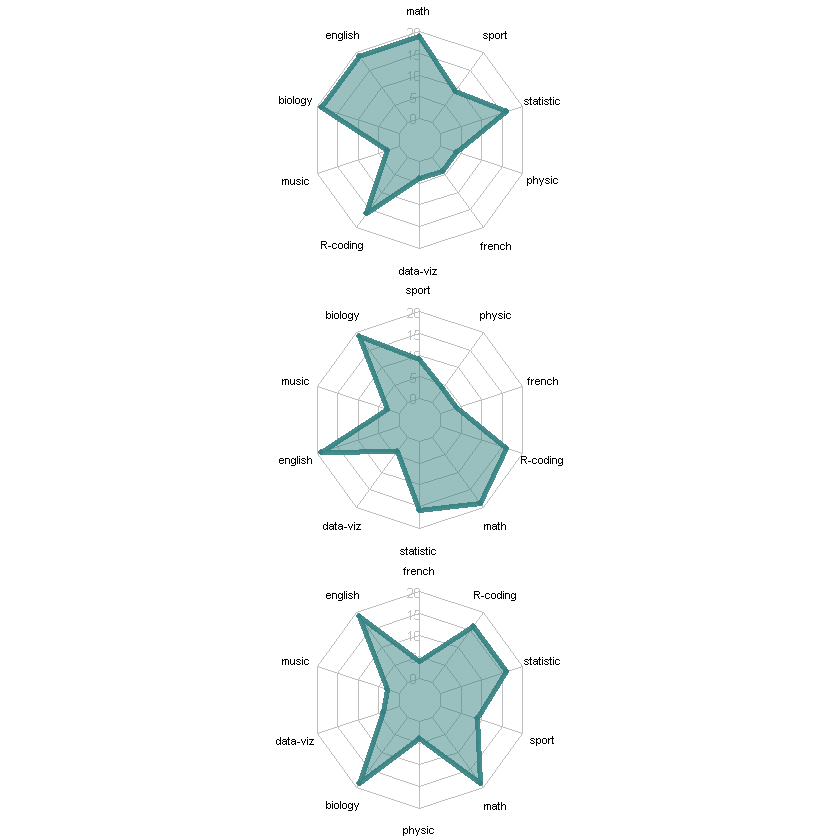

In [110]:
# 绘图
par(mar=c(0,0,0,0))
par(mfrow=c(3,1))
radarchart( data, axistype=1, pcol=rgb(0.2,0.5,0.5,0.9) , pfcol=rgb(0.2,0.5,0.5,0.5) , plwd=4 ,   
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,20,5), cglwd=0.8, vlcex=0.8  )
radarchart( data2, axistype=1, pcol=rgb(0.2,0.5,0.5,0.9) , pfcol=rgb(0.2,0.5,0.5,0.5) , plwd=4 ,  
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,20,5), cglwd=0.8, vlcex=0.8  )
radarchart( data3, axistype=1, pcol=rgb(0.2,0.5,0.5,0.9) , pfcol=rgb(0.2,0.5,0.5,0.5) , plwd=4 ,   
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,20,5), cglwd=0.8, vlcex=0.8  )

**4 不确定的数值比例**

雷达图显示几个定量变量的值，所有变量都表示在一个轴上。在前面的示例中，所有变量（范围从0 到 20的）共享相同的比例和相同的单位。但雷达图也可以显示完全不同的变量。在这种情况下，不要忘记为每个显示一个明显的比例：否则读者会期望相同的比例。

**5 对差异的过度评估**

雷达图中形状的面积也呈二次而非线性增加，这可能会导致观看者认为微小的变化比实际情况更重要。在下面的示例中，左边的学生在每个主题上的得分为 7，而右边的学生在每个主题上的得分为 14。但是，右图的面积是左图面积的两倍多。

In [111]:
# 创建数据
data <- as.data.frame(matrix( c(7,7,7,7,7) , ncol=5))
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding")
data <- rbind(rep(20,10) , rep(0,10) , data)
data
data2 <- data
data2[3,] <- rep(14,5)
data2

math,english,biology,music,R-coding
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20
0,0,0,0,0
7,7,7,7,7


math,english,biology,music,R-coding
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20
0,0,0,0,0
14,14,14,14,14


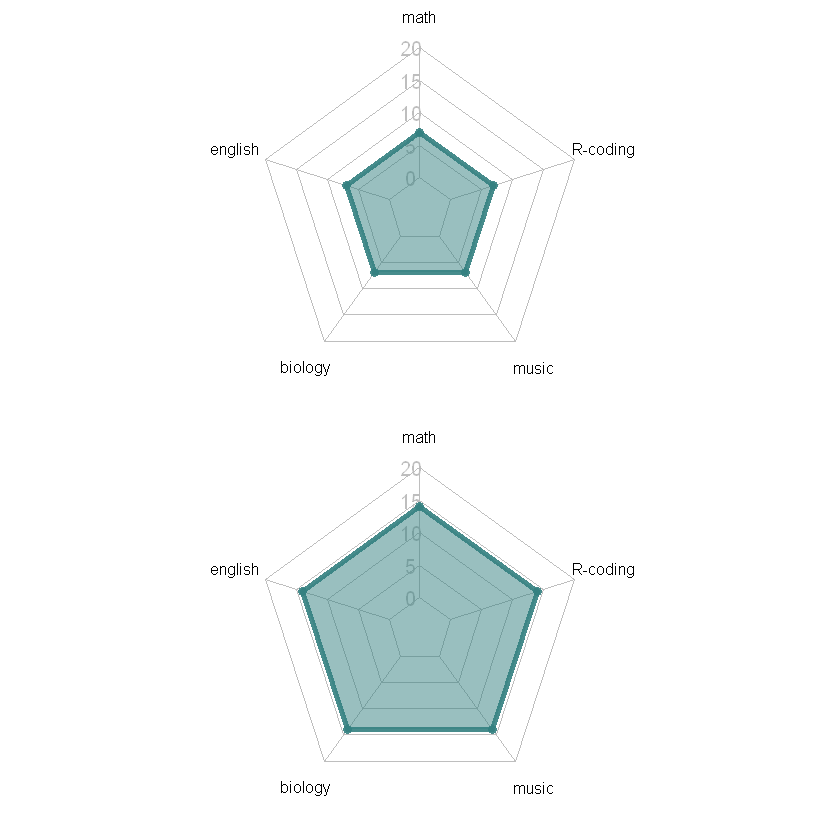

In [112]:
# 绘图
par(mar=rep(0,4))
par(mfrow=c(2,1))
radarchart( data, axistype=1, pcol=rgb(0.2,0.5,0.5,0.9) , pfcol=rgb(0.2,0.5,0.5,0.5) , 
           plwd=4 , cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,20,5), cglwd=0.8, vlcex=0.8  )
radarchart( data2, axistype=1, pcol=rgb(0.2,0.5,0.5,0.9) , pfcol=rgb(0.2,0.5,0.5,0.5) , 
           plwd=4 , cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(0,20,5), cglwd=0.8, vlcex=0.8  )

### 解决方案


如果您要显示单个系列并且所有定量变量都具有相同的比例，则使用条形图或棒棒糖图，对变量进行排名：

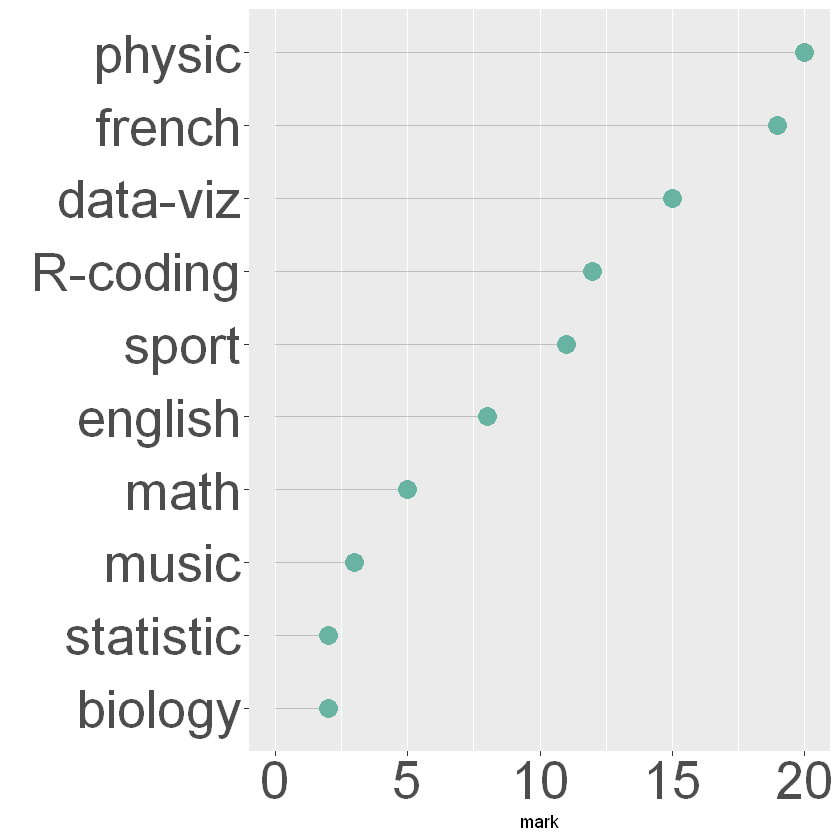

In [113]:
# 创建数据
set.seed(1)
data <-as.data.frame(matrix( sample( 2:20 , 10 , replace=T) , ncol=10))
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )
data <-rbind(rep(20,10) , rep(0,10) , data)

# 绘制条形图
data %>% slice(3) %>% t() %>% as.data.frame() %>% add_rownames() %>% arrange(V1) %>% mutate(rowname=factor(rowname, rowname)) %>%
  ggplot( aes(x=rowname, y=V1)) +
    geom_segment( aes(x=rowname ,xend=rowname, y=0, yend=V1), color="grey") +
    geom_point(size=5, color="#69b3a2") +
    coord_flip() +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      axis.text = element_text( size=32 ),
      legend.position="none"
    ) +
    ylim(0,20) +
    ylab("mark") +
    xlab("")

如果您有两个系列要绘制，您仍然可以使用条形图和棒棒糖图。这是一个有2个系列的例子。它侧重于第一个学生（深色），并让您可以看到另一个学生（浅色）的表现如何。

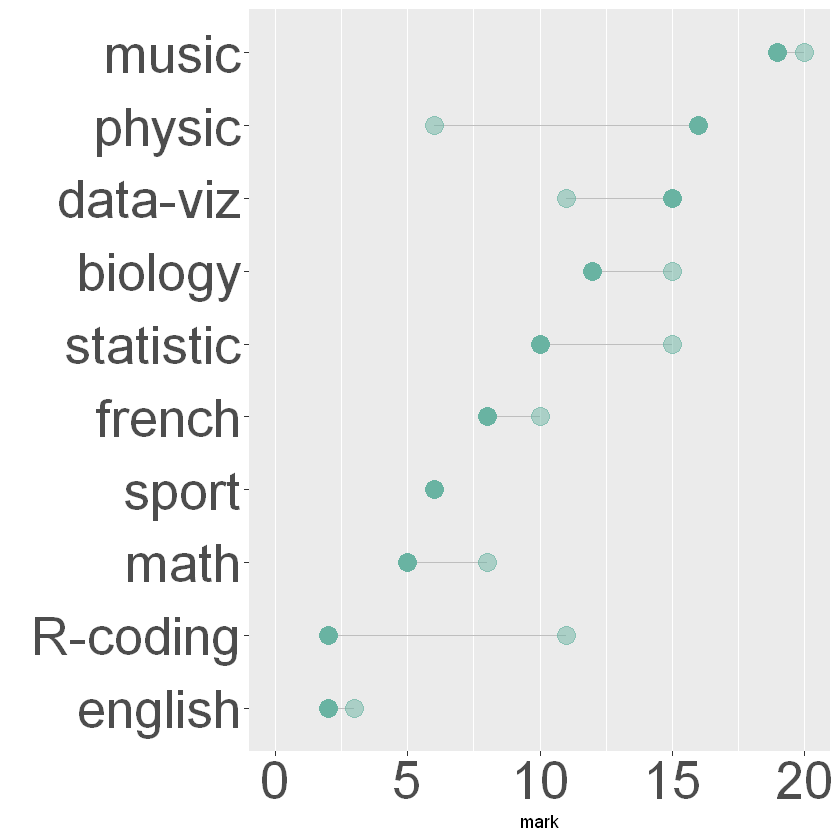

In [114]:
# 创建数据
set.seed(1)
data <-as.data.frame(matrix( sample( 2:20 , 20 , replace=T) , ncol=10))
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )
data <-rbind(rep(20,10) , rep(0,10) , data)

# 绘图
data %>% slice(c(3,4)) %>% t() %>% as.data.frame() %>% add_rownames() %>% arrange(V1) %>% mutate(rowname=factor(rowname, rowname)) %>%
  ggplot( aes(x=rowname, y=V1)) +
    # 绘制线条
    geom_segment( aes(x=rowname ,xend=rowname, y=V2, yend=V1), color="grey") +
    geom_point(size=5, color="#69b3a2") +
    # 设置透明度
    geom_point(aes(y=V2), size=5, color="#69b3a2", alpha=0.5) +
    coord_flip() +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      axis.text = element_text( size=32 )
    ) +
    ylim(0,20) +
    ylab("mark") +
    xlab("")

如果你有超过2个系列要绘制，使用条形图或棒棒糖图的分面也许可以解决问题：

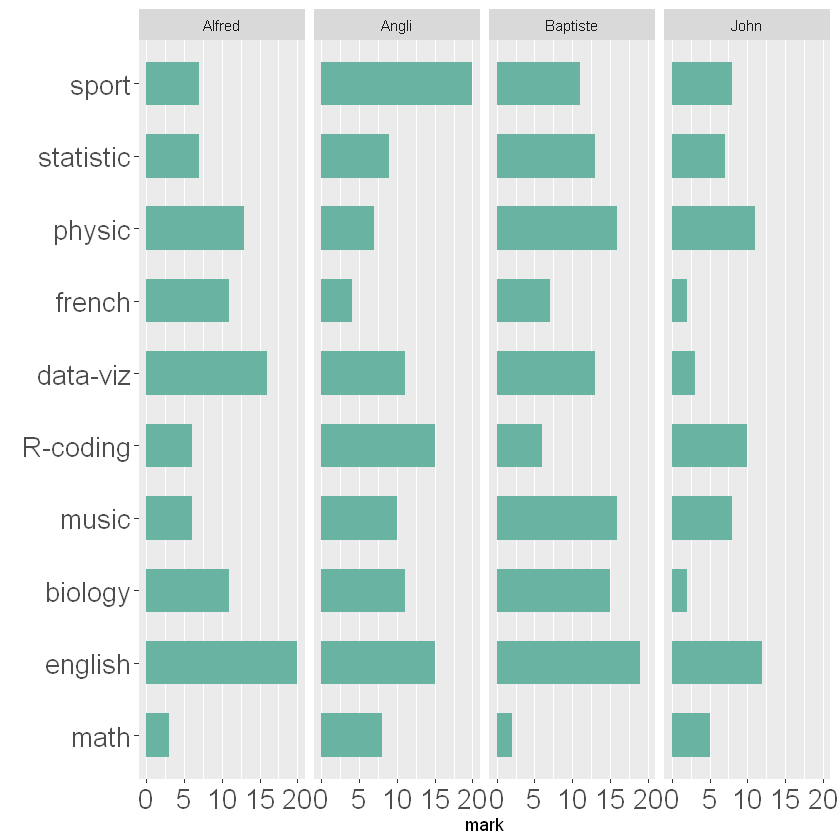

In [115]:
# 创建数据
set.seed(1)
data <-as.data.frame(matrix( sample( 2:20 , 40 , replace=T) , ncol=10))
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )
data <-rbind(rep(20,10) , rep(0,10) , data)
rownames(data) <- c("-", "--", "John", "Angli", "Baptiste", "Alfred")

# 绘图数据
data <- data %>% slice(c(3:6)) %>% 
  t() %>% 
  as.data.frame() %>% 
  add_rownames() %>% 
  arrange() %>% 
  mutate(rowname=factor(rowname, rowname)) %>% 
  gather(key=name, value=mark, -1)

# 编制数据
data$name <- recode(data$name, V1 = "John", V2 = "Angli", V3 = "Baptiste", V4 = "Alfred")

# 绘图
data %>% ggplot( aes(x=rowname, y=mark)) +
    geom_bar(stat="identity", fill="#69b3a2", width=0.6) +
    coord_flip() +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      axis.text = element_text( size=16 )
    ) +
    ylim(0,20) +
    ylab("mark") +
    xlab("") +
    facet_wrap(~name, ncol=4)

如果您有很多系列要绘制，或者您的变量没有相同的比例，那么最好的选择可能是切换到平行坐标图。

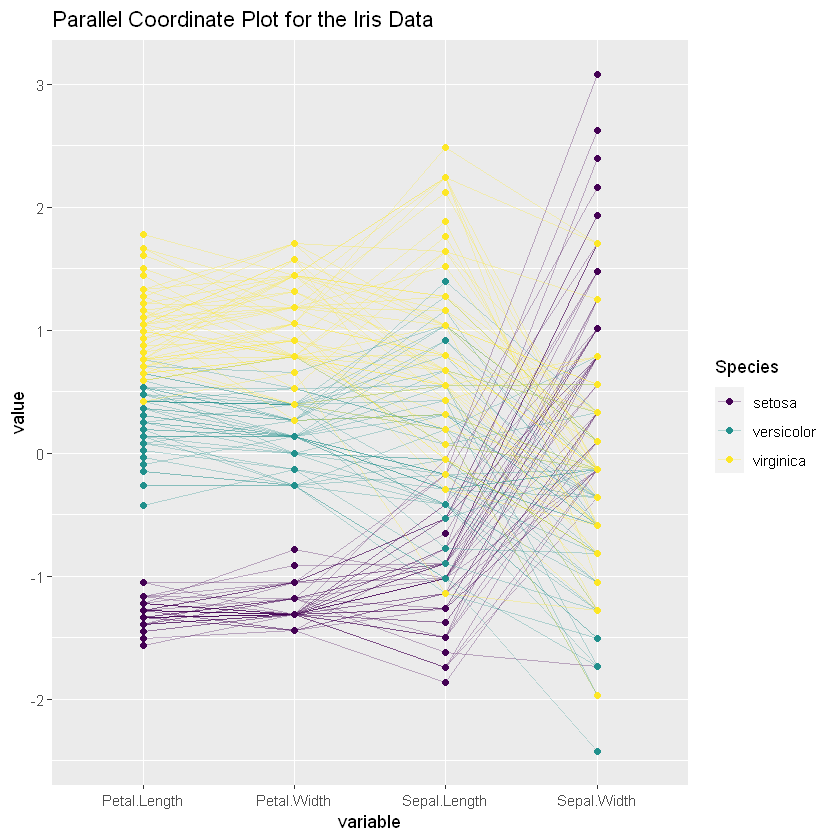

In [116]:
library(GGally)
# 导入iris数据
data <- iris

# 绘图
data %>% 
ggparcoord(
columns = 1:4, groupColumn = 5, order = "anyClass",
showPoints = TRUE, 
title = "Parallel Coordinate Plot for the Iris Data",
alphaLines = 0.3
) + 
scale_color_viridis(discrete=TRUE) 

## 参考

+ [THE RADAR CHART AND ITS CAVEATS](https://www.data-to-viz.com/caveat/spider.html)